In [24]:
from hermes_client import HermesClient, ForecastSeriesClient
from seismostats import ForecastGRRateGrid
import pandas as pd
import numpy as np
from datetime import datetime

## Overview of pages to display
### Home page 
- SED + ETH logo
- disclaimer "this is an experimental tool, not used for decision support...."
### Models (md)
- brief explanation of the models (EM1, ML1, HM1D-CAPS)
- strengths and limitations of each model
### Forecast rates 
- fig type 1 for each forecasting horizon
- default is cumulative rates
- toggle needed to see the non-cumulative rates
### Forecast FMD
- fig type 2 for each forecasting horizon
### Data (optional only if we have time)
- hydraulics 
- seismicity in time (magnitude - time plot) 
- b-value in time
- FMD observed

In [25]:
project_name = 'project_induced'
forecastseries_name = 'fs_induced'
target_forecast_start_time = datetime.fromisoformat('2022-04-21T15:00:00')
time_forecast = '2022-04-21T17:00:00'
target_borehole_section = '16A-32/section_03'
url = 'http://localhost:8000'
monthyear = 'April 2022'
starttime_stage = '2022-04-21T13:00:00'
endtime_stage = '2022-04-21T20:00:00'
mc = -1.19
cat_binning = 0.01
MAG_RED_TLS = 3.0

In [26]:
hermes_client = HermesClient(url)
project_info = hermes_client.get_project_by_name(project_name)
project_info


{'oid': 'c9d163c4-02ea-4d4d-9ef5-26e82c025c92',
 'name': 'project_induced',
 'starttime': '2022-04-21T00:00:00',
 'endtime': '2022-04-21T23:59:59',
 'description': 'This is a test project',
 'creationinfo': {'creationtime': '2025-05-22T16:51:41'}}

In [27]:
# Get the forecast series oid by name
forecastseries_info = hermes_client.get_forecastseries_by_name(project_name, forecastseries_name)
forecastseries_info

{'oid': 'd3dbad61-ab57-428d-ba60-ba30fb485fd8',
 'project_oid': 'c9d163c4-02ea-4d4d-9ef5-26e82c025c92',
 'name': 'fs_induced',
 'description': 'This is a test forecast series',
 'status': 'PENDING',
 'observation_starttime': '2022-04-21T13:00:00',
 'bounding_polygon': 'POLYGON ((-125 35, -115 35, -115 40, -125 40, -125 35))',
 'depth_min': 0.0,
 'depth_max': 10.0,
 'model_settings': {'well_section_id': '37801a57-90b9-4fb5-83d7-506ee9166acf',
  'injection_point': [8.47449792444771, 46.5098187019071, 1271.43402303251],
  'local_proj_string': 'epsg:2056',
  'epoch_duration': 600,
  'n_phases': 8},
 'tags': ['test'],
 'seismicityobservation_required': 'REQUIRED',
 'injectionobservation_required': 'REQUIRED',
 'injectionplan_required': 'REQUIRED',
 'fdsnws_url': 'file:///home/nicolas/workspaces/hermes/examples/induced/quakeml.xml',
 'hydws_url': 'http://scforge.ethz.ch:8081/hydws/v1/boreholes/caf65646-8093-4aaf-989c-1c837f497667',
 'modelconfigs': [{'oid': 'dc411fce-f4a1-43b5-b28f-356330b70

In [28]:
fs_client = ForecastSeriesClient(url, forecastseries_name, project_name)
fs_client.metadata

ForecastSeries(
    oid=UUID('d3dbad61-ab57-428d-ba60-ba30fb485fd8'),
    project_oid=UUID('c9d163c4-02ea-4d4d-9ef5-26e82c025c92'),
    name='fs_induced',
    description='This is a test forecast series',
    status='PENDING',
    bounding_polygon=<POLYGON ((-125 35, -115 35, -115 40, -125 40, -125 35))>,
    depth_min=0.0,
    depth_max=10.0,
    tags=['test'],
    seismicityobservation_required='REQUIRED',
    injectionobservation_required='REQUIRED',
    fdsnws_url='file:///home/nicolas/workspaces/hermes/examples/induced/quakeml.xml',
    hydws_url='http://scforge.ethz.ch:8081/hydws/v1/boreholes/caf65646-8093-4aaf-989c-1c837f497667',
    creationinfo={'creationtime': '2025-05-22T16:51:48'},
    injectionplans=['constant', 'double'],
    modelconfigs=['em1', 'em1_2'],
    observation_starttime=datetime.datetime(2022, 4, 21, 13, 0),
    observation_endtime=None,
    observation_window=None
)

In [29]:
# List all forecasts in the forecast series
fs_client.forecasts

[Forecast(COMPLETED, 2022-04-21 15:00:00, 2022-04-21 18:00:00),
 Forecast(COMPLETED, 2022-04-21 16:00:00, 2022-04-21 18:00:00),
 Forecast(COMPLETED, 2022-04-21 17:00:00, 2022-04-21 18:00:00)]

In [30]:
# Get the forecast of the series by start time
forecast = fs_client.get_forecast_by_time(target_forecast_start_time, method='nearest')
forecast.metadata

ForecastInfo(
    oid=UUID('5035f855-7abc-4e5f-8462-174da91b9ff6'),
    status='COMPLETED',
    starttime=datetime.datetime(2022, 4, 21, 15, 0),
    endtime=datetime.datetime(2022, 4, 21, 18, 0),
    creationinfo={'creationtime': '2025-05-22T16:52:22'},
    injectionplans=['constant', 'double'],
    modelconfigs=['em1', 'em1_2']
)

In [31]:
# request dev version of seismostats for now
rates_em1_constant = forecast.get_results('em1', 'constant')
rates_em1_constant = ForecastGRRateGrid.concat(rates_em1_constant)
rates_em1_double = forecast.get_results('em1', 'double')
rates_em1_double = ForecastGRRateGrid.concat(rates_em1_double)
rates_em1_constant

longitude_min  latitude_min  \
starttime           endtime             cell_id                                
2022-04-21 13:00:01 2022-04-21 13:10:55 0               -125.0          35.0   
2022-04-21 13:10:55 2022-04-21 13:21:49 0               -125.0          35.0   
2022-04-21 13:21:49 2022-04-21 13:32:44 0               -125.0          35.0   
2022-04-21 13:32:44 2022-04-21 13:43:38 0               -125.0          35.0   
2022-04-21 13:43:38 2022-04-21 13:54:32 0               -125.0          35.0   
...                                                        ...           ...   
2022-04-21 17:50:00 2022-04-21 18:00:00 0               -125.0          35.0   
                                        0               -125.0          35.0   
                                        0               -125.0          35.0   
                                        0               -125.0          35.0   
                                        0               -125.0          35.0   

                                                 longitude_max  latitude_max  \
starttime           endtime             cell_id                                
2022-04-21 13:00:01 2022-04-21 13:10:55 0               -115.0          40.0   
2022-04-21 13:10:55 2022-04-21 13:21:49 0               -115.0          40.0   
2022-04-21 13:21:49 2022-04-21 13:32:44 0               -115.0          40.0   
2022-04-21 13:32:44 2022-04-21 13:43:38 0               -115.0          40.0   
2022-04-21 13:43:38 2022-04-21 13:54:32 0               -115.0          40.0   
...                                                        ...           ...   
2022-04-21 17:50:00 2022-04-21 18:00:00 0               -115.0          40.0   
                                        0               -115.0          40.0   
                                        0               -115.0          40.0   
                                        0               -115.0          40.0   
                                        0               -115.0          40.0   

                                                 grid_id  number_events  \
starttime           endtime             cell_id                           
2022-04-21 13:00:01 2022-04-21 13:10:55 0              0       0.000398   
2022-04-21 13:10:55 2022-04-21 13:21:49 0              0       0.000398   
2022-04-21 13:21:49 2022-04-21 13:32:44 0              0       0.000398   
2022-04-21 13:32:44 2022-04-21 13:43:38 0              0      27.011427   
2022-04-21 13:43:38 2022-04-21 13:54:32 0              0      69.773549   
...                                                  ...            ...   
2022-04-21 17:50:00 2022-04-21 18:00:00 0             95     326.989918   
                                        0             96     349.851480   
                                        0             97     323.159706   
                                        0             98     335.573729   
                                        0             99     333.472064   

                                                        a         b   mc  \
starttime           endtime             cell_id                            
2022-04-21 13:00:01 2022-04-21 13:10:55 0        0.557233  1.759111 -1.5   
2022-04-21 13:10:55 2022-04-21 13:21:49 0        0.557233  1.759111 -1.5   
2022-04-21 13:21:49 2022-04-21 13:32:44 0        0.557233  1.759111 -1.5   
2022-04-21 13:32:44 2022-04-21 13:43:38 0        0.557233  1.759111 -1.5   
2022-04-21 13:43:38 2022-04-21 13:54:32 0        0.557233  1.759111 -1.5   
...                                                   ...       ...  ...   
2022-04-21 17:50:00 2022-04-21 18:00:00 0        1.248195  1.757511 -1.5   
                                        0        1.251401  1.770435 -1.5   
                                        0        1.249104  1.754304 -1.5   
                                        0        1.259043  1.756026 -1.5   
                                        0        1.252747  1.758827 -1.5   

  

# Fetch seismisity observation of the forecast


In [32]:
observed_seismicity = forecast.seismicityobservation
observed_seismicity

,event_type,time,latitude,longitude,depth,magnitude,magnitude_type,magnitude_mag
0,None,2022-04-21 13:41:21.545399,46.508798,8.47498,-378.590877,-1.65,mag,-1.65
1,None,2022-04-21 13:41:24.417898,46.508798,8.47498,-378.590877,-1.61,mag,-1.61
2,None,2022-04-21 13:41:38.137897,46.508798,8.47498,-378.590877,-1.71,mag,-1.71
3,None,2022-04-21 13:41:57.834400,46.508798,8.47498,-378.590877,-1.63,mag,-1.63
4,None,2022-04-21 13:42:00.599649,46.508798,8.47498,-378.590877,-1.70,mag,-1.7
...,...,...,...,...,...,...,...,...
2872,None,2022-04-21 14:59:54.199398,46.508798,8.47498,-378.590877,-1.48,mag,-1.48
2873,None,2022-04-21 14:59:54.739899,46.508798,8.47498,-378.590877,-0.86,mag,-0.86
2874,None,2022-04-21 14:59:54.975039,46.508799,8.47498,2131.741923,-0.72,mag,-0.72
2875,None,2022-04-21 14:59:56.608199,46.508799,8.47498,2129.303523,-0.71,mag,-0.71


# Fetch the injection observation of the forecast


In [33]:
# This assumes that there is only one injection well in the forecast (as multiple wells are not supported yet)
borehole_data = forecast.injectionobservations
observed_injection = borehole_data.nloc[target_borehole_section].hydraulics
observed_injection


,topflow,toppressure
datetime,,
2022-04-21 13:00:01,0.000000,1.041177e+05
2022-04-21 13:00:01,0.000000,1.041177e+05
2022-04-21 13:00:02,0.000000,1.041177e+05
2022-04-21 13:00:04,0.000000,9.578886e+04
2022-04-21 13:00:05,0.000000,9.578886e+04
...,...,...
2022-04-21 14:59:56,0.092702,3.838567e+07
2022-04-21 14:59:56,0.092551,3.839719e+07
2022-04-21 14:59:58,0.092564,3.838567e+07




## Fetch the injection plan of the forecast

In [34]:
planned_injection = forecast.injectionplans
injectionplan_double = planned_injection['double'].nloc[target_borehole_section].hydraulics
injectionplan_constant = planned_injection['constant'].nloc[target_borehole_section].hydraulics
injectionplan_double

,topflow
datetime,
2022-04-21 15:00:00,0.185063
2022-04-21 15:01:00,0.185063
2022-04-21 15:02:00,0.185063
2022-04-21 15:03:00,0.185063
2022-04-21 15:04:00,0.185063
...,...
2022-04-21 17:56:00,0.185063
2022-04-21 17:57:00,0.185063
2022-04-21 17:58:00,0.185063


# PLOTTING


In [35]:
import matplotlib.pyplot as plt

#styling
colour_injection = '#628395'
colour_stage = 'black'
colour_em1 = '#95BF8F'
colour_ml1 = '#967387'
colour_hm1d = '#E3B678'

## Forecast rates

In [36]:
def bin_center_index(df):
    df.reset_index(inplace=True)

    df.index = \
        df.apply(lambda x: x['starttime'] +
                         (x['endtime'] - x['starttime']) / 2, axis=1)

    df.drop(columns=['starttime', 'endtime', 'cell_id'], inplace=True)

    return df

In [37]:
stats = {'std': 'std'}
em1_rates = rates_em1_constant.calculate_statistics('median', stats)
em1_rates = bin_center_index(em1_rates)
hm1d_rates = rates_em1_double.calculate_statistics('median', stats)
hm1d_rates = bin_center_index(hm1d_rates)
em1_rates.tail()

,longitude_min,latitude_min,longitude_max,latitude_max,number_events,a,b,mc,alpha,depth_min,depth_max,number_events_std,b_std,mc_std,a_std,alpha_std
2022-04-21 17:15:00,-125.0,35.0,-115.0,40.0,337.156726,1.175489,1.758369,-1.5,-1.854419,0.0,10.0,8.849185,0.005351,0.0,0.005107,0.006874
2022-04-21 17:25:00,-125.0,35.0,-115.0,40.0,337.156726,1.197347,1.758369,-1.5,-1.854419,0.0,10.0,8.849185,0.005351,0.0,0.005163,0.006874
2022-04-21 17:35:00,-125.0,35.0,-115.0,40.0,337.156726,1.218140,1.758369,-1.5,-1.854419,0.0,10.0,8.849185,0.005351,0.0,0.005217,0.006874
2022-04-21 17:45:00,-125.0,35.0,-115.0,40.0,337.156726,1.237999,1.758369,-1.5,-1.854419,0.0,10.0,8.849185,0.005351,0.0,0.005270,0.006874
2022-04-21 17:55:00,-125.0,35.0,-115.0,40.0,337.156726,1.256989,1.758369,-1.5,-1.854419,0.0,10.0,8.849185,0.005351,0.0,0.005320,0.006874


## Figure type 1 for forecast rates

/tmp/ipykernel_62292/1469786220.py:89: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


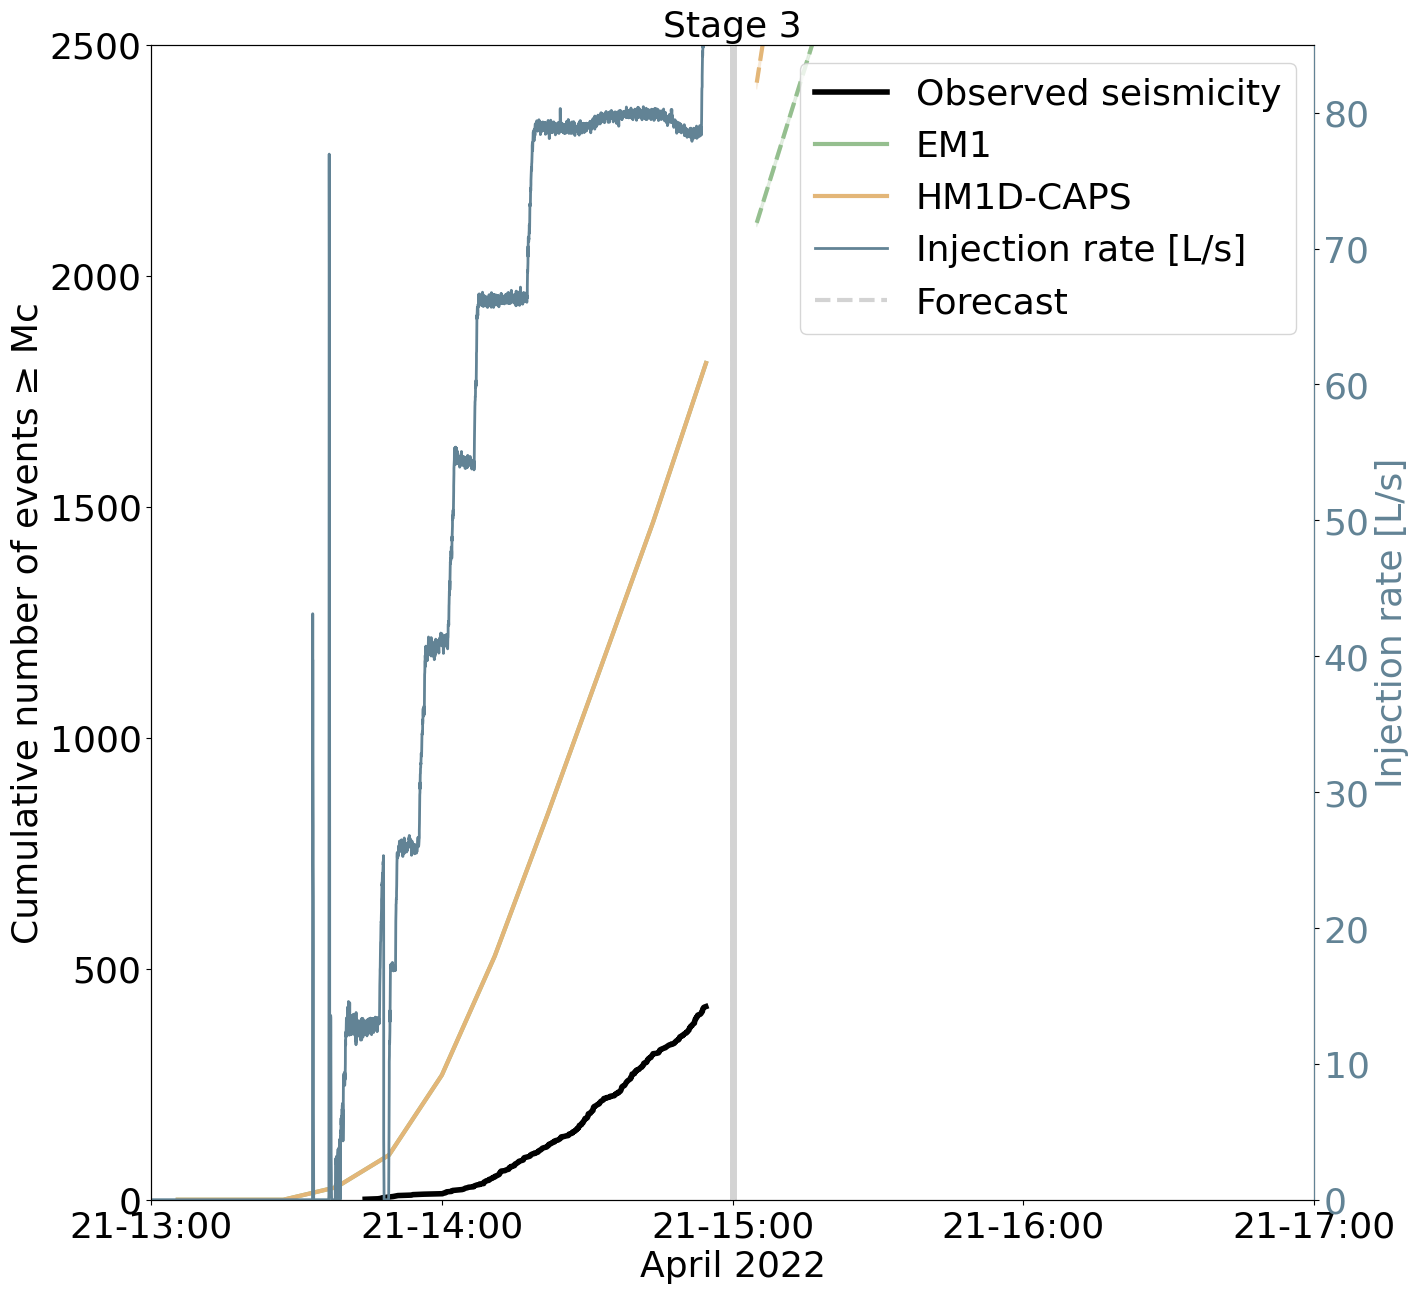

In [38]:
# figure with 2 y-axes
fig, ax1 = plt.subplots(figsize=(15, 15))
ax2 = ax1.twinx()
fontsize = 26

em1_rates['cumulative_number_events'] = em1_rates['number_events'].cumsum()
hm1d_rates['cumulative_number_events'] = hm1d_rates['number_events'].cumsum()
target_forecast_start_time_dt = pd.to_datetime(target_forecast_start_time)


# left y-axis
timesteps = em1_rates.index[em1_rates.index <= target_forecast_start_time_dt]

# count events in observed_seismisity with time before target_forecast_start_time
observed_seismisity_before = observed_seismicity[observed_seismicity['time'] < timesteps[-1]]
observed_seismicity_before_mc = observed_seismisity_before[observed_seismisity_before['magnitude'] >= mc]

ax1.plot(observed_seismicity_before_mc['time'], np.arange(1, len(observed_seismicity_before_mc) + 1), 
         color=colour_stage, linestyle='solid', linewidth=4, label='Observed seismicity')


# plot the number of events for each model before the forecast start time as a solid line
ax1.plot(em1_rates.index[em1_rates.index < target_forecast_start_time_dt], 
         em1_rates['cumulative_number_events'][em1_rates.index < target_forecast_start_time_dt], 
         color=colour_em1, linestyle='solid', linewidth=3, label='EM1')
ax1.plot(hm1d_rates.index[hm1d_rates.index < target_forecast_start_time_dt], 
         hm1d_rates['cumulative_number_events'][hm1d_rates.index < target_forecast_start_time_dt], 
         color=colour_hm1d, linestyle='solid', linewidth=3, label='HM1D-CAPS')

# plot the number of events for each model after the forecast start time as a dashed line
ax1.plot(em1_rates.index[em1_rates.index >= target_forecast_start_time_dt], 
         em1_rates['cumulative_number_events'][em1_rates.index >= target_forecast_start_time_dt], 
         color=colour_em1, linestyle='dashed', linewidth=3)
ax1.plot(hm1d_rates.index[hm1d_rates.index >= target_forecast_start_time_dt],
         hm1d_rates['cumulative_number_events'][hm1d_rates.index >= target_forecast_start_time_dt], 
         color=colour_hm1d, linestyle='dashed', linewidth=3)

# add uncertainty bands for the number of events for each model after the forecast start time
ax1.fill_between(em1_rates.index[em1_rates.index >= target_forecast_start_time_dt], 
                 em1_rates['cumulative_number_events'][em1_rates.index >= target_forecast_start_time_dt] - em1_rates['number_events_std'][em1_rates.index >= target_forecast_start_time_dt], 
                 em1_rates['cumulative_number_events'][em1_rates.index >= target_forecast_start_time_dt] + em1_rates['number_events_std'][em1_rates.index >= target_forecast_start_time_dt], 
                 color=colour_em1, alpha=0.2)
ax1.fill_between(hm1d_rates.index[hm1d_rates.index >= target_forecast_start_time_dt],
                    hm1d_rates['cumulative_number_events'][hm1d_rates.index >= target_forecast_start_time_dt] - hm1d_rates['number_events_std'][hm1d_rates.index >= target_forecast_start_time_dt],
                    hm1d_rates['cumulative_number_events'][hm1d_rates.index >= target_forecast_start_time_dt] + hm1d_rates['number_events_std'][hm1d_rates.index >= target_forecast_start_time_dt],
                    color=colour_hm1d, alpha=0.2)

# plot the hydraulic data on the right y-axis
ax2.plot(observed_injection.index, observed_injection['topflow']*1000, color=colour_injection, 
         label='Injection rate [L/s]', linewidth=2)
# colour label ax2 
ax2.spines['right'].set_color(colour_injection)
ax2.yaxis.label.set_color(colour_injection)
# plot forecasted hydraulic data on the right y-axis (dashed line) using the last value of observed_injection for topflow and em1_rates.index >= target_forecast_start_time_dt
ax2.plot(em1_rates.index[em1_rates.index >= target_forecast_start_time_dt], 
         np.full(len(em1_rates.index[em1_rates.index >= target_forecast_start_time_dt]), 
                 observed_injection['topflow'].iloc[-1]*1000), 
         color=colour_injection, linestyle='dashed', linewidth=2)
ax2.tick_params(axis='y', labelcolor=colour_injection,labelsize=fontsize)
# add thick vertical grey line at the time of the forecast start
ax1.axvline(pd.to_datetime(target_forecast_start_time), color='lightgrey', linewidth=5)
# add invisible grey dashed line for the legend
ax2.axvline(pd.to_datetime(target_forecast_start_time), color='lightgrey', linestyle='dashed', linewidth=3, label='Forecast')
# change fontsize of the x-axis and y-axis labels

ax1.set_xlabel(monthyear, fontsize=fontsize)
ax1.set_ylabel('Cumulative number of events ≥ Mc', fontsize=fontsize)
ax2.set_ylabel('Injection rate [L/s]', fontsize=fontsize)
ax1.tick_params(axis='x', labelsize=fontsize)
ax1.tick_params(axis='y', labelsize=fontsize)
ax2.tick_params(axis='y', labelsize=fontsize)

 # format the x-axis ticks 
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%H:%M'))
# ticks every hour
ax1.xaxis.set_major_locator(plt.matplotlib.dates.HourLocator(interval=1))
# limits for the x-axis
ax1.set_xlim([pd.to_datetime(starttime_stage), pd.to_datetime(endtime_stage)-pd.Timedelta(hours=3)])
# legend
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes, ncols=1, fontsize=fontsize)

# left y-axis as log
#ax1.set_yscale('log')
ax1.set_ylim([0, 2500])
ax2.set_ylim([0, 85])

# title 'Stage 3'
ax1.set_title('Stage 3', fontsize=fontsize)
fig.show()

## FMD

In [39]:
from seismostats import Catalog, FDSNWSEventClient
from seismostats.plots import plot_cum_fmd

In [40]:
def gutenberg_richter(magnitudes: np.ndarray, b_value: float,
                      mc: float, n_mc: int) -> np.ndarray:
    """ Estimates the cumulative Gutenberg richter law (proportional to the
    complementary cumulative FMD) for a given magnitude vector.

    Args:
        magnitudes: vector of magnitudes
        b_value: theoretical b_value
        mc: completeness magnitude
        n_mc: cumulative number of all events larger than the completeness
            magnitude (n_mc = 10 ** a)
    """
    return n_mc * 10 ** (-b_value * (magnitudes - mc))

In [41]:
# this doesn't need to be so complicated, but for reference:
from urllib.parse import urlparse
from pathlib import Path

fdsnws = fs_client.metadata.fdsnws_url
starttime = fs_client.metadata.observation_starttime
endtime = forecast.metadata.starttime

#safely parse local file path
path = urlparse(fdsnws)
if path.scheme == 'file':
    # if it is a local file
    path = Path(path.path)
    catalogue = Catalog.from_quakeml(path)
    catalogue = catalogue[(catalogue['time'] >= starttime) & 
                          (catalogue['time'] <= endtime)]
elif path.scheme in ('http', 'https'):
    # if it is a webservice
    fdsnws_client =FDSNWSEventClient(path.geturl())
    catalogue = fdsnws_client.get_events(starttime, endtime, batch_size=1000)
else:
    # or just use the observed seismicity
    catalogue = observed_seismicity

catalogue

,event_type,time,latitude,longitude,depth,magnitude,magnitude_type,magnitude_mag
0,None,2022-04-21 13:41:21.545399,46.508798,8.47498,-378.590877,-1.65,mag,-1.65
1,None,2022-04-21 13:41:24.417898,46.508798,8.47498,-378.590877,-1.61,mag,-1.61
2,None,2022-04-21 13:41:38.137897,46.508798,8.47498,-378.590877,-1.71,mag,-1.71
3,None,2022-04-21 13:41:57.834400,46.508798,8.47498,-378.590877,-1.63,mag,-1.63
4,None,2022-04-21 13:42:00.599649,46.508798,8.47498,-378.590877,-1.70,mag,-1.7
...,...,...,...,...,...,...,...,...
2872,None,2022-04-21 14:59:54.199398,46.508798,8.47498,-378.590877,-1.48,mag,-1.48
2873,None,2022-04-21 14:59:54.739899,46.508798,8.47498,-378.590877,-0.86,mag,-0.86
2874,None,2022-04-21 14:59:54.975039,46.508799,8.47498,2131.741923,-0.72,mag,-0.72
2875,None,2022-04-21 14:59:56.608199,46.508799,8.47498,2129.303523,-0.71,mag,-0.71


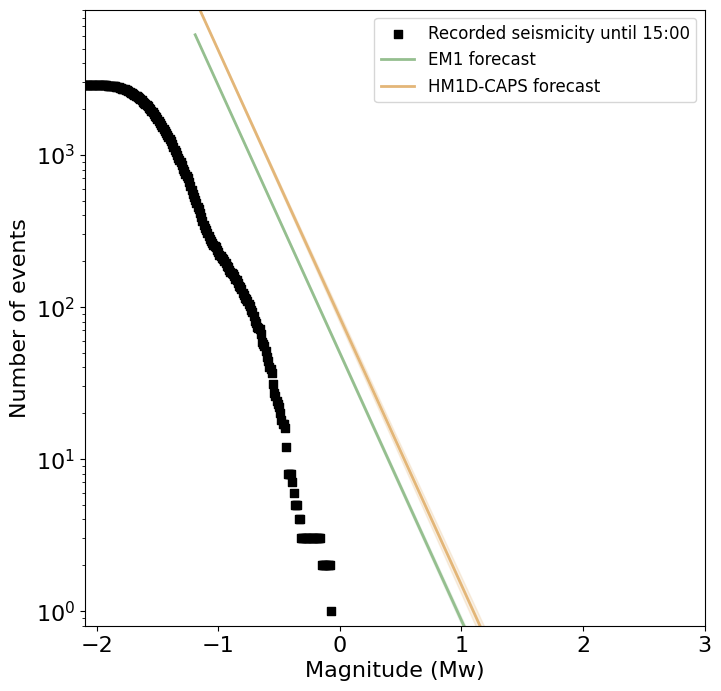

In [42]:
# subset the catalogue to the time of the forecast
starttime_stage_dt = pd.to_datetime(starttime_stage)
cat_training = catalogue[(catalogue.time >= starttime_stage_dt) & (catalogue.time <= target_forecast_start_time_dt)]

# find index of the em1_rates dataframe with time closest to time_forecast_dt
time_forecast_dt = pd.to_datetime(time_forecast) 
model_forecast_time = em1_rates.index[em1_rates.index >= time_forecast_dt][0]
cat_forecast = catalogue[(catalogue.time > starttime_stage_dt) & (catalogue.time <= model_forecast_time)]
# plot the cumulative fmd of the catalogue


ax = plt.subplots(figsize=(8, 8))[1]

plot_cum_fmd(cat_training.magnitude, delta_m=0.01, ax=ax, color='black')
#plot_cum_fmd(cat_forecast.magnitude, delta_m=0.01, ax=ax, color='grey')

# model forecasts FMD
magnitudes_steps = np.arange(mc, MAG_RED_TLS, cat_binning)

#EM1
cum_n_mc_em1 = em1_rates['cumulative_number_events'][em1_rates.index >= time_forecast_dt].values[0]
b_em1 = em1_rates['b'][em1_rates.index >= time_forecast_dt].values[0]
GR_em1 = gutenberg_richter(magnitudes_steps, b_em1, mc, cum_n_mc_em1)
# plot GR_em1(magntitudes_steps) as a line colour_em1
ax.plot(magnitudes_steps, GR_em1, color=colour_em1, linestyle='solid', linewidth=2, label='EM1')
#HM1D
cum_n_mc_hm1d = hm1d_rates['cumulative_number_events'][hm1d_rates.index >= time_forecast_dt].values[0]
b_hm1d = hm1d_rates['b'][hm1d_rates.index >= time_forecast_dt].values[0]
GR_hm1d = gutenberg_richter(magnitudes_steps, b_hm1d, mc, cum_n_mc_hm1d)
# plot GR_hm1d(magntitudes_steps) as a line colour_hm1d
ax.plot(magnitudes_steps, GR_hm1d, color=colour_hm1d, linestyle='solid', linewidth=2, label='HM1D-CAPS')

# Uncertainty bands
# EM1
std_b_em1 = em1_rates['b_std'][em1_rates.index >= time_forecast_dt].values[0]
ax.fill_between(magnitudes_steps, 
                 gutenberg_richter(magnitudes_steps, b_em1 - 2*std_b_em1, mc, cum_n_mc_em1), 
                 gutenberg_richter(magnitudes_steps, b_em1 + 2*std_b_em1, mc, cum_n_mc_em1), 
                 color=colour_em1, alpha=0.2)
# HM1D
std_b_hm1d = np.sqrt(b_hm1d / GR_hm1d[0])
ax.fill_between(magnitudes_steps, 
                 gutenberg_richter(magnitudes_steps, b_hm1d - 2*std_b_hm1d, mc, cum_n_mc_hm1d), 
                 gutenberg_richter(magnitudes_steps, b_hm1d + 2*std_b_hm1d, mc, cum_n_mc_hm1d), 
                 color=colour_hm1d, alpha=0.2)

# axis labels
ax.set_xlabel('Magnitude (Mw)', fontsize=16)
ax.set_ylabel('Number of events', fontsize=16)
# tick labels font size
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# set x-axis limits
ax.set_xlim([-2.1, MAG_RED_TLS])
# set y-axis limits
ax.set_ylim([0.8, 9000])
# remove the legend
ax.legend().remove()
# legend with EM1, HM1D-CAPS, ML1
string_target_forecast_start_time = target_forecast_start_time_dt.strftime('%H:%M')
string_model_forecast_time = model_forecast_time.strftime('%H:%M')
ax.legend([f'Recorded seismicity until {string_target_forecast_start_time}',
           #f'Recorded seismicity until {string_model_forecast_time}',
           'EM1 forecast', 'HM1D-CAPS forecast'], loc='upper right', fontsize=12)
# add title
#ax.set_title('Stage 3', fontsize=16)
plt.show()

